In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')


In [ ]:
test_data.head()


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15656300.0,Smith,602.0,France,Male,38.0,0.0,128524.19,2.0,0.0,1.0,78622.46
1,15001,15610454.0,Chialuka,624.0,France,Male,39.0,4.0,0.00,1.0,1.0,1.0,133086.45
2,15002,15732672.0,T'ang,744.0,Spain,Male,30.0,3.0,0.00,2.0,1.0,0.0,134732.99
3,15003,15586821.0,Hsia,714.0,France,Female,44.0,8.0,0.00,1.0,1.0,0.0,132979.14
4,15004,15711352.0,Nwokeocha,670.0,Germany,Female,25.0,9.0,134970.12,2.0,0.0,1.0,60420.07


In [ ]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15643359.0,Chidubem,605.0,France,Male,29.0,5.0,0.00,1.0,1.0,1.0,151623.91,0.0
1,1,15624703.0,Okechukwu,700.0,France,Male,37.0,4.0,115301.31,2.0,1.0,1.0,162501.83,0.0
2,2,15583392.0,Okeke,572.0,France,Male,49.0,2.0,62610.96,1.0,1.0,1.0,142514.69,1.0
3,3,15594878.0,Yobanna,813.0,Germany,Male,31.0,8.0,134591.35,1.0,0.0,0.0,90591.15,0.0
4,4,15792669.0,Ch'ang,670.0,France,Female,38.0,7.0,0.00,1.0,1.0,0.0,148528.24,0.0


In [ ]:
train_data.shape
test_data.shape

(10000, 13)

In [ ]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,7499.500000,1.569298e+07,659.446933,37.732267,4.976267,43502.827963,1.586533,0.780133,0.498867,1.178744e+05,0.204800
std,4330.271354,7.149846e+04,73.272078,8.193802,2.800421,60245.054927,0.532163,0.414170,0.500015,4.756063e+04,0.403569
min,0.000000,1.556570e+07,438.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.477300e+02,0.000000
25%,3749.750000,1.563518e+07,604.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,8.308433e+04,0.000000
50%,7499.500000,1.569074e+07,663.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.225805e+05,0.000000
75%,11249.250000,1.575798e+07,710.000000,42.000000,7.000000,111204.467500,2.000000,1.000000,1.000000,1.568682e+05,0.000000
max,14999.000000,1.581566e+07,850.000000,74.000000,10.000000,187911.550000,4.000000,1.000000,1.000000,1.816018e+06,1.000000


In [ ]:
train_data.dtypes

id                   int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [ ]:
train_data.columns.values

array(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [ ]:
#find null values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [ ]:
# Handle missing values (if any)
train_data = train_data.dropna()
test_data = test_data.dropna()

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
test_data['Gender'] = label_encoder.transform(test_data['Gender'])

In [ ]:
# Features and target
X = train_data.drop(['Exited', 'id'], axis=1)
y = train_data['Exited']

In [ ]:
# Identify numerical and categorical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Gender', 'Geography']


In [ ]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

In [ ]:
# Preprocessing for categorical data
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Bundle preprocessing for numerical and categorical data
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


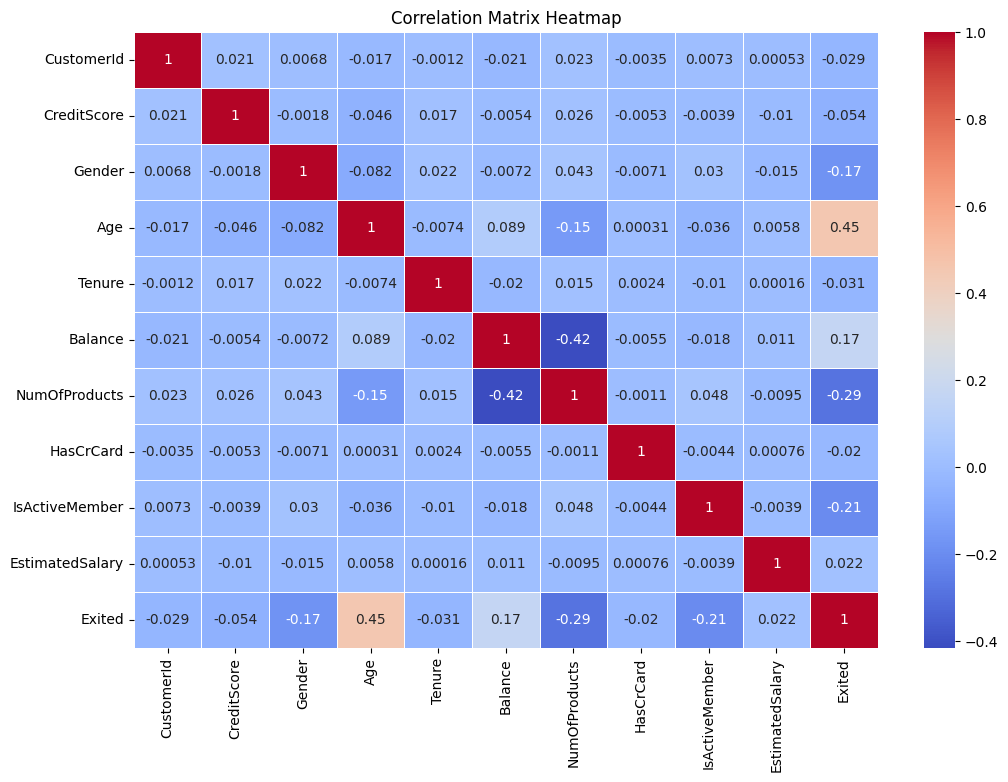

In [ ]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))

# Select only numerical columns for correlation calculation
numerical_columns = train_data.select_dtypes(include=['number']).columns
corr_matrix = train_data[numerical_columns].drop(['id'], axis=1, errors='ignore').corr()  # Handle potential KeyError if 'id' is already dropped
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True)
}


In [ ]:
# Split the data
X = train_data.drop(['Exited', 'id'], axis=1)
y = train_data['Exited']
X_test = test_data.drop(['id'], axis=1)

In [ ]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check for non-numeric columns in X_train
from imblearn.over_sampling import SMOTE
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

# Handle non-numeric columns (example: one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # 'ignore' to handle new categories in test data
X_train_encoded = encoder.fit_transform(X_train[non_numeric_columns])

# Convert sparse matrix to dense array if necessary
X_train_encoded = X_train_encoded.toarray()

# Combine encoded non-numeric features with numeric features
X_train_numeric = X_train.select_dtypes(include=['number'])
X_train_processed = np.concatenate((X_train_numeric, X_train_encoded), axis=1)

# Instantiate the SMOTE object
smote = SMOTE()  # Initialize SMOTE here

# Now apply SMOTE
X_res, y_res = smote.fit_resample(X_train_processed, y_train)

Index(['Surname'], dtype='object')


In [ ]:
# # Import necessary libraries
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # Handle non-numeric columns (one-hot encoding for 'Geography')
# encoder = OneHotEncoder(handle_unknown='ignore')
# encoded_data = encoder.fit_transform(X_train[['Geography']])
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Geography']))

# # Drop original 'Geography' column and concatenate encoded features
# X_train = X_train.drop('Geography', axis=1)
# X_train = pd.concat([X_train, encoded_df], axis=1)

# # Apply SMOTE to handle imbalanced data
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Logistic Regression ROC-AUC: 0.8733297488349807
Decision Tree ROC-AUC: 0.7583361961129076
Random Forest ROC-AUC: 0.9167220290371905
Gradient Boosting ROC-AUC: 0.9284741120965804
Support Vector Machine ROC-AUC: 0.8839985652827337


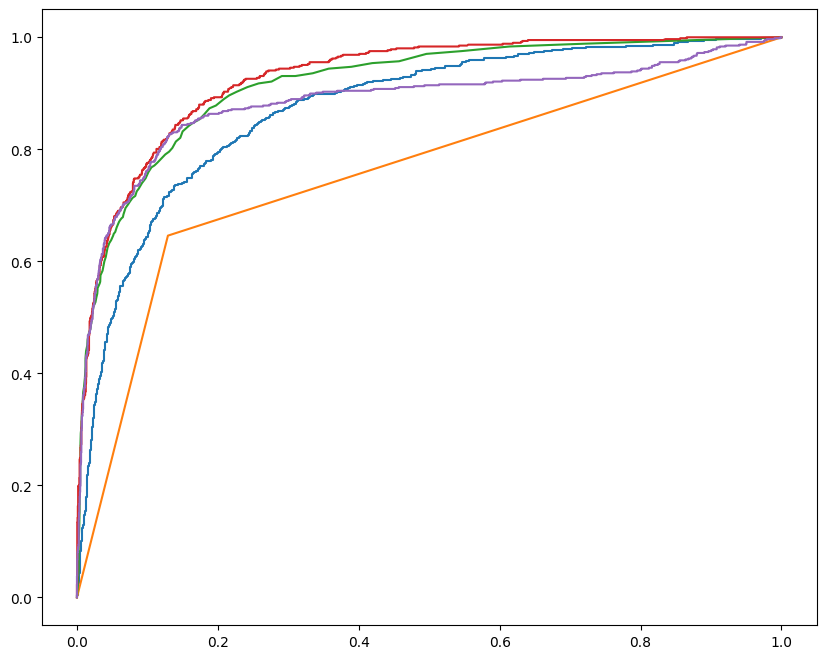

In [ ]:
# Evaluate each model
results = {}
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_val_pred)
    results[model_name] = roc_auc
    print(f'{model_name} ROC-AUC: {roc_auc}')

    from sklearn.metrics import roc_auc_score, roc_curve, auc
    fpr, tpr, _ = roc_curve(y_val, y_val_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

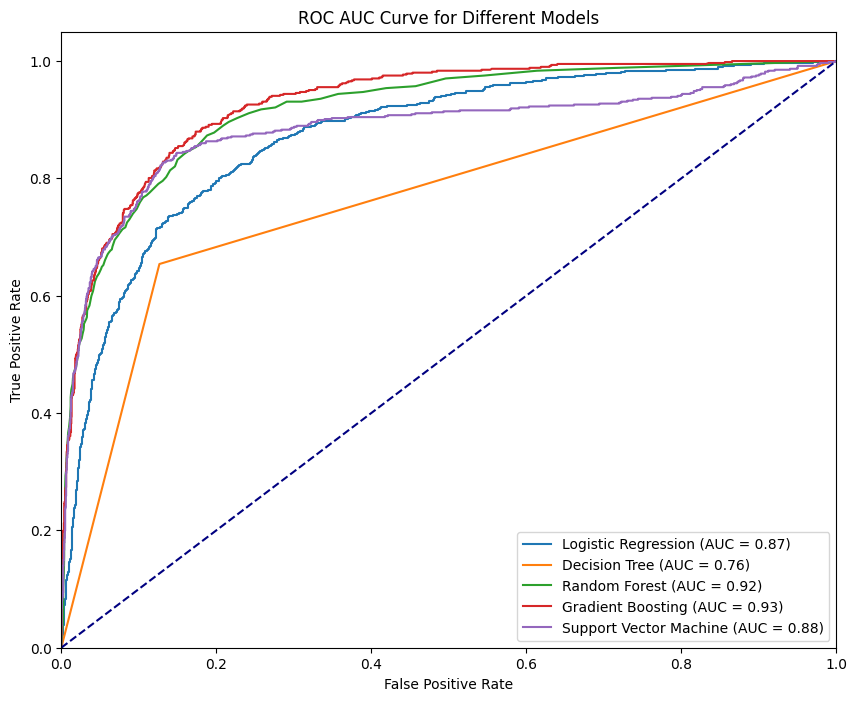

In [ ]:
# Evaluate each model and plot ROC curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_val_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Different Models')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Select the best model based on ROC-AUC
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f'Best model: {best_model_name} with ROC-AUC: {results[best_model_name]}')


Best model: Gradient Boosting with ROC-AUC: 0.9284741120965804


In [ ]:
#Hyperparameter tuning for the best model
param_grid = {
    'Random Fq
        orest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5]
    }
}


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the training data again to create a validation set for hyperparameter tuning
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

grid_search = GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor),
                                           ('classifier', best_model)]),
                           param_grid=param_grid[best_model_name],
                           cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


In [ ]:
# Train the best model on the entire training set
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', best_model)])
clf.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Geography'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:
# Predict on the test set
test_pred = clf.predict_proba(X_test)[:, 1]

In [ ]:
# Create submission file
submission = pd.DataFrame({'id': test_data['id'], 'Exited': test_pred})
submission.to_csv('submission.csv', index=False)

In [ ]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Evaluate on validation set
y_val_pred = clf.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f'Random Forest ROC-AUC on Validation Set: {roc_auc}')

Random Forest ROC-AUC on Validation Set: 0.9376985730621507


In [ ]:
# Train the model on the entire training set
clf.fit(X, y)

# Predict on the test set
test_pred = clf.predict_proba(X_test)[:, 1]


In [ ]:
# Create submission file
submission = pd.DataFrame({'id': test_data['id'], 'Exited': test_pred})
submission.to_csv('submission_random_forest.csv', index=False)

In [ ]:
# Define the model
model = SVC(probability=True)

In [ ]:
# Evaluate on validation set
y_val_pred = clf.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f'SVM ROC-AUC on Validation Set: {roc_auc}')

SVM ROC-AUC on Validation Set: 0.9376985730621507


In [ ]:
# Train the model on the entire training set
clf.fit(X, y)

# Predict on the test set
test_pred = clf.predict_proba(X_test)[:, 1]


In [ ]:
# prompt: download the cvs file code

from google.colab import files

# Download the CSV file
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>